In [194]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.backends.backend_pdf import PdfPages

import dpkt
import numpy as np
import time
import brewer2mpl

from AttackAnalysis import compute_effective_rate, compute_sending_rate, compute_all_rates
from analyze import compute_global_throughput, parse_file, removeOutliers
from read_conf import ReadHosts

In [44]:
host_to_ip, ip_to_host = ReadHosts('experiment_oak.conf')
interval = 5
root_dir = 'workdir/results-experiment4/'
figures_dir = 'paper-plots/exp4_nash/'

# postfixes to go through
postfixes=[]
titles=[]
for k in [1,2,3,4]:
    for d in [15,17,20]:
        app = str(k) + '_d_' + str(d)
        title = '(k=%d, m=%d)' %(k,d)
        postfixes.append(app)
        titles.append(title)

In [4]:
linestyles = ['-', '--', '-.', ':']
markers = []
for m in Line2D.markers:
    try:
        if len(m) == 1 and m != ' ':
            markers.append(m)
    except TypeError:
        pass

styles = markers + [
    r'$\lambda$',
    r'$\bowtie$',
    r'$\circlearrowleft$',
    r'$\clubsuit$',
    r'$\checkmark$']

In [5]:
def get_througput_array (entry, interval_s):
    num_buckets = np.size(entry.inbytes)
    buckets = np.arange(0, num_buckets * interval_s, interval_s)

    bps = 10e-6 * entry.inbytes * 8 / interval_s
    
    return buckets, bps

In [6]:
def compute_everything(prefix='results-experiment4_k_', capfile='servernode-log_agent-tcpdump.cap',
                       verbose=False, postfix=[''], shost='servernode'):
    throughput = {}
    for post in postfix:
        filename = root_dir + prefix + post
        print "----> Generating throughput for %s" % filename
        filename += '/' + capfile

        start_time = time.time()
        throughput[post] = compute_global_throughput(filename, interval, host_to_ip[shost])
        end_time = time.time()
        if verbose:
            print "Time taken is ", end_time - start_time
            
    return throughput

In [73]:
def plot_next_to_each_other(in_throughput, in_host_to_ip, titles, postfix, host='clientnode-1',
                            yincr=5, ylimincr=5, ystart=-1, coloridx=1, variance=False):
    fig = plt.figure()
    plotnum = 1
    
    num_subplots = len(postfix)
    if num_subplots == 0:
        print "[ERROR:] Empty input postfix array!"
        return 
    
    host_ip = in_host_to_ip[host]
    
    # put three plots next to each other
    num_rows = num_subplots / 3
    if num_subplots % 3 > 0:
        num_rows += 1
    
    k = 0
    for post in postfix:
        maxbps = 0
    
        ax = fig.add_subplot(num_rows,3,plotnum)
        th = in_throughput[post]
        host_th = th[host_ip]

        host_bucket, host_bps = get_througput_array (host_th, interval_s=interval)

        ax.plot(host_bucket, host_bps, marker=None, markerfacecolor='none', 
                label=post, linewidth=2, color=colors[coloridx])
        plotnum += 1
            
        maxbps = np.maximum(maxbps, np.max(host_bps))

        ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
        ax.set_ylim(ystart, maxbps+ylimincr)
        ax.set_xticks([0,100,200,300,400,500,600])
        ax.set_xlim(0,599)

        # set y ticks
        yrange = np.arange (0,maxbps+ylimincr,yincr)
        ax.set_yticks(yrange)

#         if k%3==0:
#             ax.set_yticklabels([])  
        if k%3==0:
            ax.set_ylabel('Throughput (Mbps)')
        
        ax.set_xlabel('Time (seconds)')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.tick_params(axis='x', direction='out')
        ax.tick_params(axis='y', length=0)
        ax.set_axisbelow(True)
        ax.set_title(titles[k])
        
        # draw the average line
        mean = np.mean(host_bps[24:96])
        # ax.axhline(np.mean(host_bps[24:96]), linestyle='--', linewidth=2, xmin=.2, xmax=.8)
        ax.axhline(np.mean(host_bps[24:96]), linestyle='--', linewidth=2)
        if variance:
            cvar = np.std(host_bps[24:96])
            ax.axhline(mean+cvar, linestyle='--', linewidth=1, color=colors[2])
            ax.axhline(mean-cvar, linestyle='--', linewidth=1, color=colors[2])

        ax.axvspan(120,480,color='red', alpha=0.1)
        k += 1
        

#     if num_subplots%3 == 0:
#         ax = fig.axes[-3]
#     elif num_subplots%3 == 2:
#         ax = fig.axes[-2]
#     elif num_subplots%3 == 1:
#         ax = fig.axes[-1]
    
#     legend = ax.legend(loc = 9, ncol=5, bbox_to_anchor=(1.05, -0.2), borderaxespad=1.0)
#     frame = legend.get_frame()
#     frame.set_facecolor('1')
#     frame.set_edgecolor('0.75')

# Client throughput analysis

In [14]:
throughput = compute_everything(verbose=True, postfix=postfixes)

----> Generating throughput for workdir/results-experiment4/results-experiment4_k_1_d_4
Time to read pcap file 0.0369579792023
Time taken is  260.402675152
----> Generating throughput for workdir/results-experiment4/results-experiment4_k_1_d_8
Time to read pcap file 0.000267028808594
Time taken is  188.797813892
----> Generating throughput for workdir/results-experiment4/results-experiment4_k_1_d_12
Time to read pcap file 0.000248908996582
Time taken is  146.010019064
----> Generating throughput for workdir/results-experiment4/results-experiment4_k_1_d_15
Time to read pcap file 0.000241041183472
Time taken is  56.634718895
----> Generating throughput for workdir/results-experiment4/results-experiment4_k_1_d_17
Time to read pcap file 0.000196933746338
Time taken is  45.7729029655
----> Generating throughput for workdir/results-experiment4/results-experiment4_k_1_d_20
Time to read pcap file 0.000188112258911
Time taken is  39.9784419537
----> Generating throughput for workdir/results-exp

In [115]:
# change these for each section depending on your need
bmap = brewer2mpl.get_map('OrRd', 'Sequential', 4)
colors = bmap.mpl_colors

params = {
   'axes.labelsize': 10,
   'text.fontsize': 10,
   'legend.fontsize': 9,
   'legend.handlelength': 2,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
   'text.usetex': False,
   'figure.figsize': [9,21]
   }
plt.rcParams.update(params)

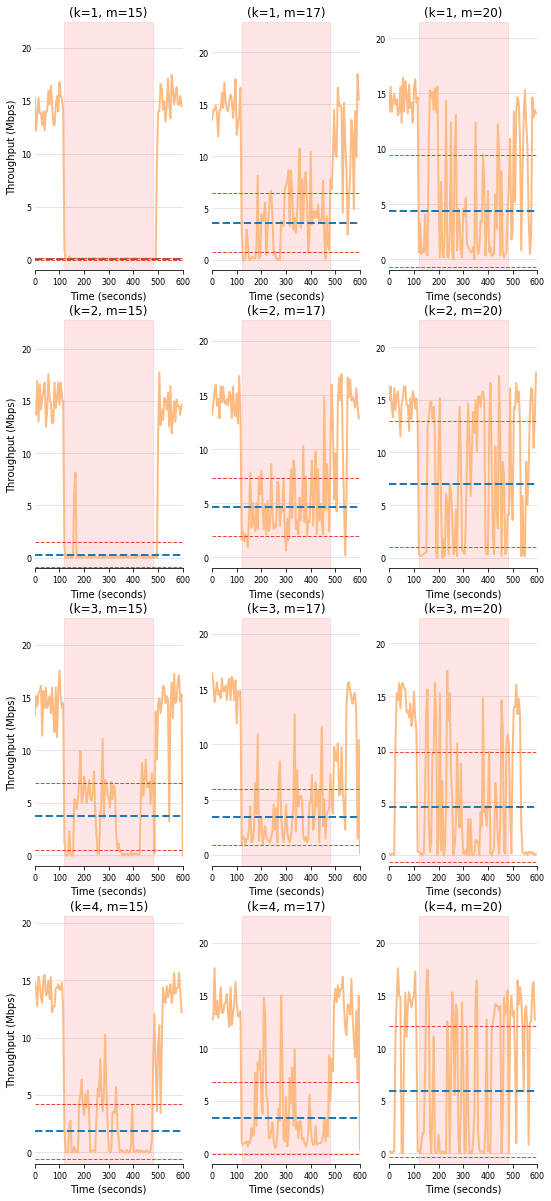

In [74]:
plot_next_to_each_other(throughput, host_to_ip, titles, postfix=postfixes, host='clientnode-9',
                            yincr=5, ylimincr=5, ystart=-1, coloridx=1, variance=True)

In [267]:
# change these for each section depending on your need
bmap = brewer2mpl.get_map('OrRd', 'Sequential', 5)
colors = bmap.mpl_colors

params = {
   'axes.labelsize': 12,
   'text.fontsize': 10,
   'legend.fontsize': 9,
   'legend.handlelength': 2,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
   'text.usetex': False,
   'figure.figsize': [15,3]
   }
plt.rcParams.update(params)

In [260]:
# fix up the data into a matrix
def prepare_data_for_plot(in_throughput, in_host_to_ip=host_to_ip, host='clientnode-1'):
    # throughput is of the form [key] = throughput for all clients
    data = {}
    host_ip = in_host_to_ip[host]
    for k in [1,2,3,4]:
        data[k] = []
        for m in [12,15,17,20]: 
            key = str(k) + '_d_' + str(m)
            host_bucket, host_bps = get_througput_array (in_throughput[key][host_ip], interval_s=interval)
            data[k].append(host_bps[24:96])
    
    return data

In [125]:
# function for setting the colors of the box plots pairs
def setBoxColors(bp):
    plt.setp(bp['boxes'][0], color=colors[0])
    plt.setp(bp['caps'][0], color=colors[0])
    plt.setp(bp['caps'][1], color=colors[0])
    plt.setp(bp['whiskers'][0], color=colors[0])
    plt.setp(bp['whiskers'][1], color=colors[0])
    plt.setp(bp['fliers'][0], color=colors[0])
    plt.setp(bp['fliers'][1], color=colors[0])
    plt.setp(bp['medians'][0], color=colors[0])

    plt.setp(bp['boxes'][1], color=colors[1])
    plt.setp(bp['caps'][2], color=colors[1])
    plt.setp(bp['caps'][3], color=colors[1])
    plt.setp(bp['whiskers'][2], color=colors[1])
    plt.setp(bp['whiskers'][3], color=colors[1])
    plt.setp(bp['fliers'][2], color=colors[1])
    plt.setp(bp['fliers'][3], color=colors[1])
    plt.setp(bp['medians'][1], color=colors[1])
    
    plt.setp(bp['boxes'][2], color=colors[2])
    plt.setp(bp['caps'][4], color=colors[2])
    plt.setp(bp['caps'][5], color=colors[2])
    plt.setp(bp['whiskers'][4], color=colors[2])
    plt.setp(bp['whiskers'][5], color=colors[2])
    plt.setp(bp['fliers'][4], color=colors[2])
    plt.setp(bp['fliers'][5], color=colors[2])
    plt.setp(bp['medians'][2], color=colors[2])

    plt.setp(bp['boxes'][3], color=colors[3])
    plt.setp(bp['caps'][6], color=colors[3])
    plt.setp(bp['caps'][7], color=colors[3])
    plt.setp(bp['whiskers'][6], color=colors[3])
    plt.setp(bp['whiskers'][7], color=colors[3])
    plt.setp(bp['fliers'][6], color=colors[3])
    plt.setp(bp['fliers'][7], color=colors[3])
    plt.setp(bp['medians'][3], color=colors[3])

In [269]:
from matplotlib.patches import Polygon

def handle_axis(bp, ax, k):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if k==1:
        ax.spines['left'].set_visible(False)
        ax.set_ylabel('Throughput(Mbps)')
    else:
        ax.spines['left'].set_linewidth(0.2)
    
    ax.get_xaxis().tick_bottom()
    ax.tick_params(axis='x', direction='out')
    ax.tick_params(axis='y', length=0)
    
    ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
    ax.set_axisbelow(True)
    
    
    for i in range(0, len(bp['boxes'])):
        bp['boxes'][i].set_color(colors[i])
        # we have two whiskers
        bp['whiskers'][i*2].set_color(colors[i])
        bp['whiskers'][i*2 + 1].set_color(colors[i])
        bp['whiskers'][i*2].set_linewidth(2)
        bp['whiskers'][i*2 + 1].set_linewidth(2)

        bp['medians'][i].set_color('black')
        bp['medians'][i].set_linewidth(3)
        # and 4 caps to remove
        for c in bp['caps']:
            c.set_linewidth(0)

        for i in range(len(bp['boxes'])):
            box = bp['boxes'][i]
            box.set_linewidth(0)
            boxX = []
            boxY = []
            for j in range(5):
                boxX.append(box.get_xdata()[j])
                boxY.append(box.get_ydata()[j])
                boxCoords = zip(boxX,boxY)
                boxPolygon = Polygon(boxCoords, facecolor = colors[i], linewidth=0)
                ax.add_patch(boxPolygon)


def plot_box_plots(data, host_to_ip):
    fig = plt.figure()
    
    fig, axes = plt.subplots(ncols=4, sharey=True)
    fig.subplots_adjust(wspace=0)
    
    k=1
    for ax, name in zip(axes, ['k=1','k=2','k=3', 'k=4']):
        bp = ax.boxplot(data[k], showfliers=False)
        ax.set(xticklabels=['m=12', 'm=15', 'm=17', 'm=20'], xlabel=name)
        ax.margins(0.05) # Optional
        handle_axis(bp, ax, k)
        
        #if k > 2:
        #    ax.set_yticks([])
        if k==1:
            ax.get_yaxis().tick_left()
        k += 1
    
    plt.savefig(figures_dir + 'nash_box.pdf', bbox_inches = 'tight')

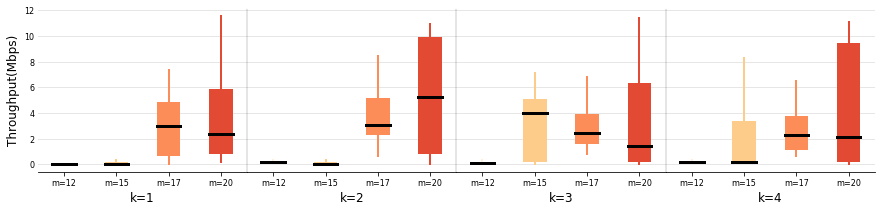

In [270]:
data = prepare_data_for_plot(throughput)
plot_box_plots(data, host_to_ip)